Oasis Infobytes

Task:5 Sales Price Prediction

Name:Nikhil Jawla

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Advertising.csv')


In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

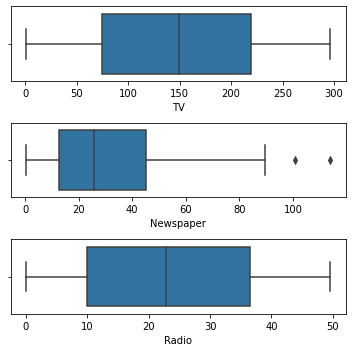

In [ ]:
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax= axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax= axs[1])
plt3 = sns.boxplot(df['Radio'], ax= axs[2])
plt.tight_layout() 



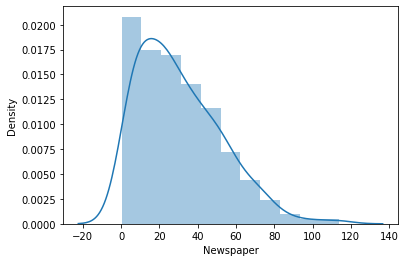

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.25)+ (iqr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
61.275000000000006


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

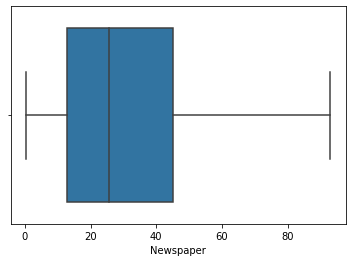

In [ ]:
sns.boxplot(data['Newspaper'])

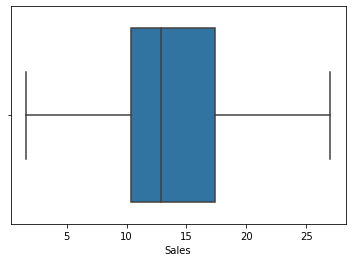

In [ ]:
sns.boxplot(data['Sales']);

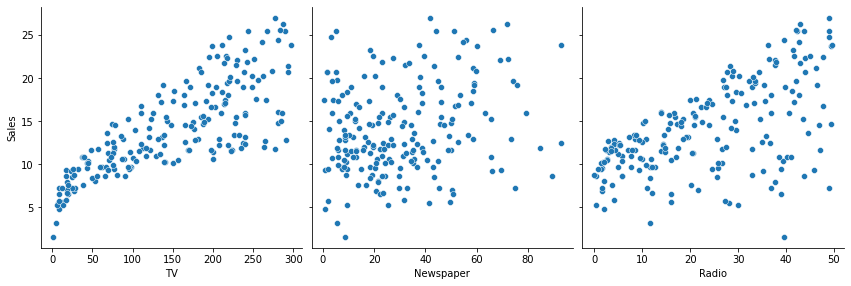

In [ ]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4, aspect=1,kind='scatter')
plt.show()

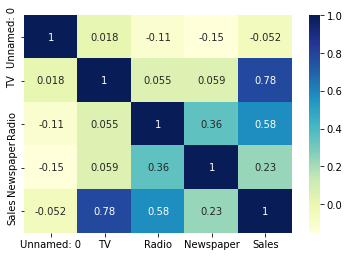

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn= KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred =knn.predict(x_test)

In [ ]:
print(knn_train_pred,knn_test_pred)

[17.   13.94 12.96 15.1   7.76 16.68 16.24 16.14 19.66 16.56  7.3  17.48
 13.04 16.4  18.66  7.3  18.44 11.    9.84 17.48 13.98 15.92  7.3   6.42
  9.7  12.9  21.78 21.38 15.18  9.84 13.98 10.36 14.06 18.42  9.62 16.98
 14.26 14.34 16.78 14.82 11.7  15.06 10.98 16.54 17.4   9.9  11.7  18.44
 13.06  6.42 15.3  18.92  6.68 11.7  19.4  14.82  6.42 18.92 10.52 10.98
  8.26 16.78 16.98  9.84 16.88 18.3  17.62 15.92 12.9  16.78 11.1  18.14
 19.06 16.62 16.62 16.14 16.2  10.52 20.2  18.62 18.14 18.9  10.98 17.58
 20.22 17.4  14.8   6.42 19.4   9.96 13.8   9.62 14.5  10.52 11.7   6.68
  9.66 15.28 19.76  7.3  14.6  10.74 10.94  8.9  19.88 18.54 17.52 19.02
 14.74 13.94 17.52 18.3   7.3   9.84 11.   14.42  6.22  8.26 10.52 20.2
 14.84 19.2  15.14 16.2   9.66 13.2  15.18 21.78 19.16 14.06 10.94 16.78
 21.38 16.14] [ 7.3  18.66 10.12  8.26 13.98 21.78  6.42 18.54 16.98 16.78 11.8  18.14
  7.3  16.14 10.12 17.4  11.   18.54 10.52 15.18 11.7  11.8  21.38  7.3
 18.42 17.52 14.8  17.28 18.14 11.   15

In [ ]:
Results = pd.DataFrame(columns=["Models","Train R2","Test R2","Test RMSE","Varience"])

In [ ]:
r2=r2_score(y_test,knn_test_pred)
r2_train =r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6784946566322588
RMSE: 3.039204441356921


In [ ]:
Results.head()

,Models,Train R2,Test R2,Test RMSE,Varience,Model,Variance
0,NaN,0.617213,0.678495,3.039204,NaN,K-Nearest Neighbors,-0.061282


In [ ]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [ ]:
print(svr_train_pred , svr_test_pred)  

[15.96337216 17.33336789 12.37590984 15.23773033  7.19063818 16.41219379
 14.75475548 15.12925185 17.02781726 16.84748059  6.93390146 16.63264795
 12.65784129 17.43747332 16.58573408  6.8959987  16.43220335 11.84202771
  8.61934273 16.66581101 13.98150114 17.30492284  6.83555603  6.55458644
  9.41033991 13.05911899 16.06880489 16.39916678 14.42708905  8.73706529
 13.92939117  9.86407953 13.5449137  17.34038594  8.35981746 17.39709939
 14.1046687  15.44857181 17.46994107 15.50438354 10.47409361 15.65211055
 11.63789147 17.07966692 16.0642615   9.59965275 10.50052146 16.49931012
 12.87260157  6.56198482 15.31293997 17.26381936  6.69176919 10.55974233
 17.10015038 15.62454699  6.48947363 17.25341407  9.91933457 11.6551244
  7.31518298 17.47132684 17.4114926   7.86353221 15.88331786 17.2252674
 16.81731206 17.30492284 13.02007162 17.47157419 12.1271443  17.18501344
 16.33166949 17.39326677 17.38259148 15.08197893 16.21434389 10.07720493
 16.19760768 17.02492564 17.12626027 17.20717207 11.3

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2, "Test RMSE":rmse, "Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6334557292282788
RMSE: 3.2451071061272714


In [ ]:
Results.head()

,Models,Train R2,Test R2,Test RMSE,Varience,Model,Variance
0,NaN,0.617213,0.678495,3.039204,NaN,K-Nearest Neighbors,-0.061282
1,NaN,0.530165,0.633456,3.245107,NaN,Support Vector Machine,-0.103291
2,NaN,0.530165,0.633456,3.245107,NaN,Support Vector Machine,-0.103291


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()    

In [ ]:
model.params

const    7.360526
x1       0.045786
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           4.85e-25
Time:                        10:51:44   Log-Likelihood:                -354.40
No. Observations:                 134   AIC:                             712.8
Df Residuals:                     132   BIC:                             718.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3605      0.611     12.053      0.0

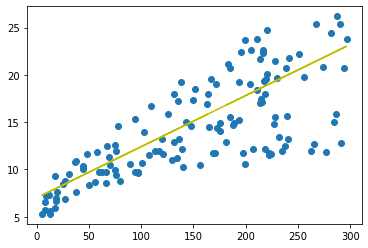

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.995 + 0.0541 * x_train, 'y')

In [ ]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

53     5.478923
122   -6.016623
94    -0.777958
193    4.602344
44    -0.009758
         ...   
159   -0.490562
127   -2.232575
104    2.433213
169   -5.377528
95     2.062596
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([15.72107684, 17.61662348, 12.2779583 , 14.99765566,  8.5097581 ,
       16.20641004, 14.53063692, 14.89234751, 17.01224629, 16.74668661,
        8.25793427, 16.46739109, 12.52978213, 17.9874913 , 20.24474853,
        8.21672673, 16.22930311, 11.82467541,  9.57199679, 16.50859863,
       13.78432266, 17.54336564,  8.14804751,  7.74512938, 10.0893803 ,
       12.90064995, 20.80333957, 20.45536482, 14.21471248,  9.64983325,
       13.7339579 , 10.38699028, 13.36309007, 19.05430861,  9.39800942,
       17.81350393, 13.90336665, 15.20369333, 18.42703835, 15.25863672,
       10.79906563, 15.4051524 , 11.65984527, 19.58084935, 15.82638498,
       10.2130029 , 10.81738009, 16.30713957, 12.72666258,  7.75886522,
       15.0709135 , 17.44721472,  7.9649029 , 10.85858763, 17.13129028,
       15.37768071,  7.60777093, 17.42432165, 10.4236192 , 11.67358111,
        8.61964486, 18.31715158, 17.86844731,  9.05003467, 15.63866177,
       17.36479965, 16.70547908, 17.54336564, 12.86402103, 18.35

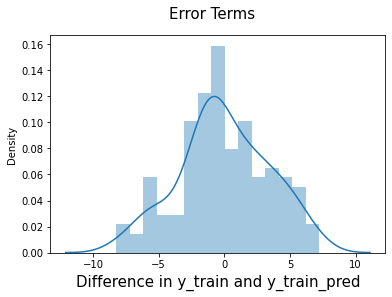

In [ ]:
fig = plt.figure()
sns.distplot(res, bins =15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize =15)
plt.show()

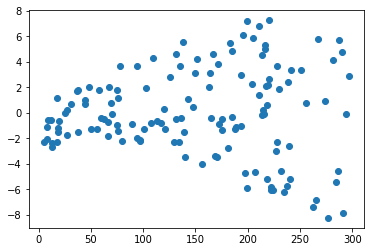

In [ ]:
plt.scatter(x_train, res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

array([ 8.13431166, 20.21269823,  9.32933019,  8.53265117, 13.83010881,
       20.77128926,  7.54824893, 18.73380556, 17.895919  , 18.34462328,
       11.28439883, 19.52132735,  8.24877704, 14.94271228,  9.33390881,
       15.95916482, 11.76515341, 18.75212002, 10.51977011, 14.21929109,
       10.85858763, 11.35307806, 20.34547806,  8.18009781, 19.3244469 ,
       16.4078691 , 18.2301579 , 16.11025912, 19.38854751, 11.74226034,
       15.46467439,  7.39257602, 12.87775688, 10.72122918, 13.73853651,
       17.69903855, 12.4290526 , 12.6717192 , 12.38784506, 16.63222124,
        8.67000962, 11.40344282,  7.69476461, 18.34004466,  8.50517948,
       15.46467439, 12.99680087, 10.49229842,  9.16907867, 11.49959374,
       18.49571757, 16.95730291, 18.35378051, 20.18980515, 12.14975708,
        9.81008478,  7.75428661, 16.50859863, 10.80822286, 10.78075117,
        8.4502361 , 18.98105077, 16.47654832, 20.03871085, 16.8336803 ,
       13.74769374])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.893334248764139

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.7086160806997382

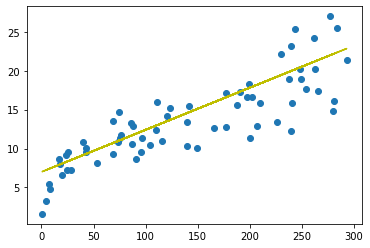

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test,'y')
plt.show()